In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from PIL import Image

# Load and preprocess images
num_images = 448
image_size = 28  # Assuming MNIST images are 28x28 pixels

image_data = []
for i in range(1, num_images + 1):
    image_path = f"{i}.png"
    img = Image.open(image_path).convert("L")  # Convert to grayscale
    img_array = np.array(img).reshape(-1)  # Flatten image
    image_data.append(img_array)

image_data = np.array(image_data)

# Perform PCA for dimension reduction
n_components = 350
pca = PCA(n_components=n_components)
reduced_features = pca.fit_transform(image_data)

# Create a dataframe with the extracted features
feature_columns = [f"Feature_{i+1}" for i in range(n_components)]
df = pd.DataFrame(reduced_features, columns=feature_columns)

# Display the dataframe
print(df)


       Feature_1   Feature_2    Feature_3   Feature_4   Feature_5   Feature_6  \
0    -291.276508  337.831751   168.630211  -58.454956 -688.411140  449.975372   
1    -104.941681  -62.723573  1179.924819  524.975861  363.636892 -244.235635   
2    -680.330707 -153.264972  1040.695172 -284.622257  110.402209   50.708872   
3     521.958327  909.677798    42.185899  815.659957 -355.046980 -365.041730   
4    1059.110013  312.973274   251.513784 -714.844074 -406.403101 -445.916161   
..           ...         ...          ...         ...         ...         ...   
443  -229.820449 -907.700908  -175.892286   95.023597  230.231376 -484.268036   
444    94.914383 -473.001439  -456.524852 -431.601632  163.819106 -610.688462   
445  -317.314915 -356.420919  -839.970831  168.884544 -198.034796  422.534251   
446  -402.586385  127.670084  -351.336372 -573.948678 -137.539388  454.574508   
447   460.831764   32.260445    15.493913 -609.749385 -789.211555 -356.863289   

      Feature_7   Feature_8

In [2]:
df.to_csv("pca_data_300.csv")

C:\Users\zimin\AppData\Local\Temp\ipykernel_12512\2986506327.py:36: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


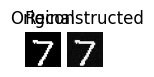

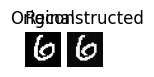

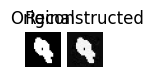

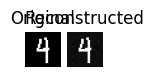

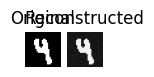

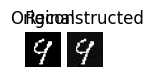

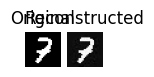

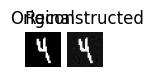

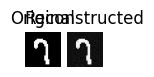

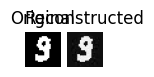

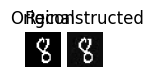

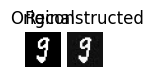

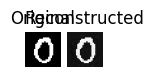

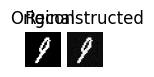

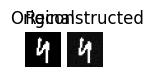

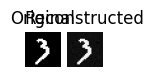

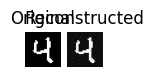

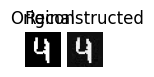

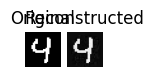

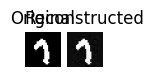

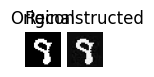

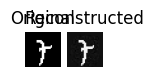

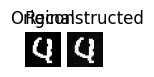

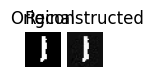

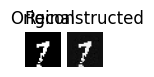

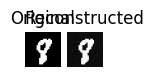

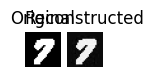

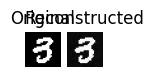

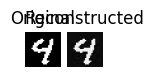

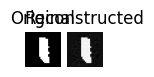

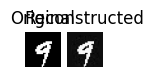

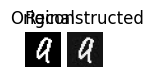

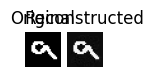

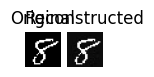

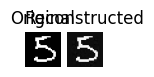

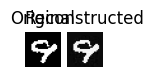

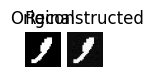

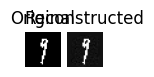

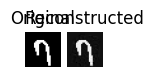

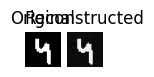

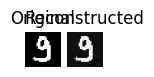

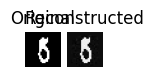

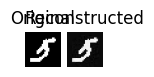

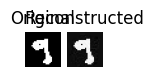

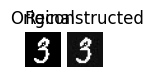

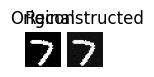

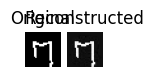

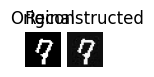

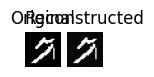

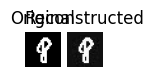

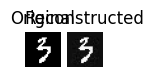

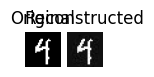

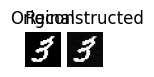

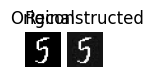

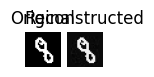

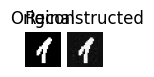

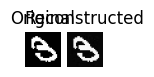

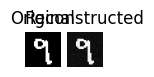

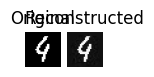

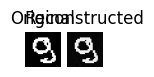

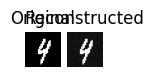

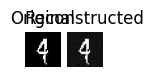

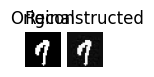

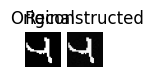

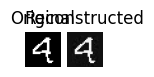

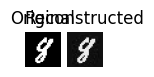

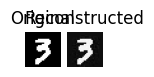

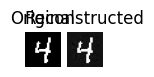

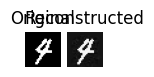

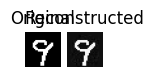

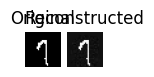

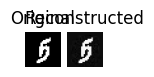

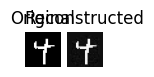

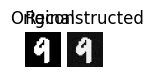

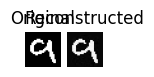

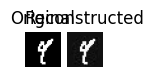

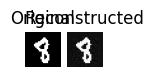

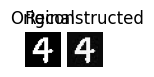

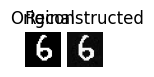

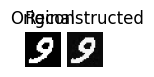

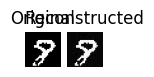

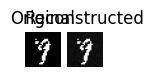

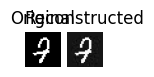

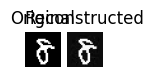

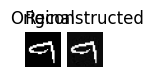

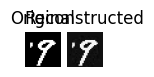

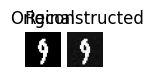

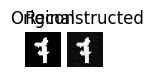

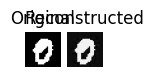

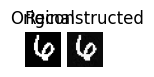

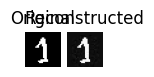

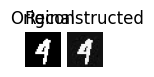

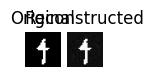

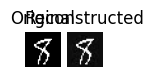

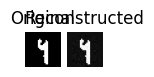

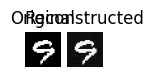

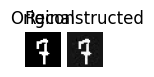

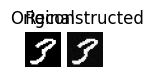

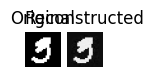

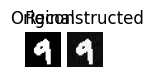

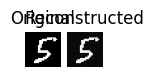

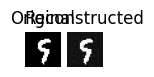

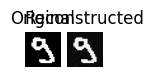

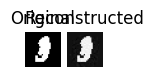

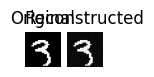

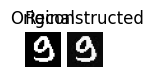

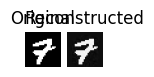

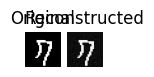

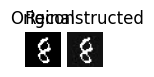

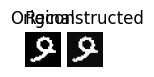

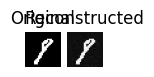

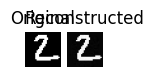

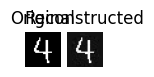

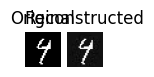

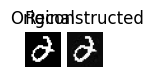

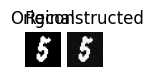

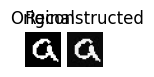

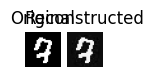

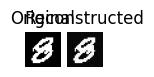

KeyboardInterrupt: 

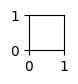

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from skimage import io, color

# Load images and convert to numpy array
image_folder = './'
image_files = sorted([f for f in os.listdir(image_folder) if f.endswith('.png')])

images = []
for file in image_files:
    img = io.imread(os.path.join(image_folder, file))
    img_gray = color.rgb2gray(img[:, :, :3])
    images.append(img_gray.flatten())

images = np.array(images)

# Perform PCA analysis
num_components = 300
pca = PCA(n_components=num_components)
pca.fit(images)

# Transform images using the top principal components
transformed_images = pca.transform(images)
reconstructed_images = pca.inverse_transform(transformed_images)

# Reshape reconstructed images to original shape
reconstructed_images = reconstructed_images.reshape(-1, img_gray.shape[0], img_gray.shape[1])

# Display original and reconstructed images
for i in range(len(image_files)):
    plt.figure(figsize=(1, 1))
    plt.axis('off')

    plt.subplot(1, 2, 1)
    plt.imshow(images[i].reshape(img_gray.shape[0], img_gray.shape[1]), cmap='gray')
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed_images[i], cmap='gray')
    plt.title('Reconstructed')
    plt.axis('off')
    plt.show()


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from skimage import io, color

# Load images and convert to numpy array
image_folder = './'
image_files = sorted([f for f in os.listdir(image_folder) if f.endswith('.png')])

images = []
for file in image_files:
    img = io.imread(os.path.join(image_folder, file))
    img_gray = color.rgb2gray(img[:, :, :3])
    images.append(img_gray.flatten())

images = np.array(images)

# Perform PCA analysis
for num_components in [310,320,330,340]:

    pca = PCA(n_components=num_components)
    pca.fit(images)

    # Transform images using the top principal components
    transformed_images = pca.transform(images)
    reconstructed_images = pca.inverse_transform(transformed_images)

    # Reshape reconstructed images to original shape
    reconstructed_images = reconstructed_images.reshape(-1, img_gray.shape[0], img_gray.shape[1])

    # Save reconstructed images
    output_folder = './reconstructed_'+str(num_components)
    for i, file in enumerate(image_files):
        output_path = os.path.join(output_folder, f'reconstructed_{file}')
        io.imsave(output_path, reconstructed_images[i])

    print("Reconstructed images saved.")

Lossy conversion from float64 to uint8. Range [-0.04919975476300727, 1.0270269356336705]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.03375698971498834, 1.0274301361911387]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.060751663970216425, 1.0407005502189943]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.053641091431484336, 1.0395747076391855]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.07022743682391094, 1.0448563275446274]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.04991145759024619, 1.0286728901441677]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.06676217328859228,

Reconstructed images saved.


Lossy conversion from float64 to uint8. Range [-0.04424040915900429, 1.0303607915315265]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.030784019090686877, 1.0322607717943042]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.0431883291570073, 1.0228597745416879]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.047534722519913204, 1.0361733570151985]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.06018809844895271, 1.0525744725342514]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.05390412109486174, 1.0156614024278872]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.05294583040769148, 

Reconstructed images saved.


Lossy conversion from float64 to uint8. Range [-0.036267882435364794, 1.0147523471118025]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.025798459993678344, 1.021782274604644]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.041417685560352996, 1.0192945279637016]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.04573909950157697, 1.0259482874388521]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.058580021092488783, 1.04554390943174]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.04705636672564385, 1.0147616281859178]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.03349550789143668, 

Reconstructed images saved.


Lossy conversion from float64 to uint8. Range [-0.03074872594715814, 1.0126285677147076]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.026091735462278304, 1.0188346972609041]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.031175618348259312, 1.01634052979382]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.046393704020606184, 1.0192149755446103]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.05544938615584479, 1.0396439502182513]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.04230700110390089, 1.013754182481947]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.029696542147042253, 

Reconstructed images saved.
